# MAST30034 Assignment1

# Preprocessing

In [2]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [3]:
# Read the inital Data set
yellow_09 = pd.read_csv("E:/Uni/MAST30034/Data/yellow_tripdata_2018-09.csv")

In [4]:
# Overview the dateset
yellow_09

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-09-01 00:01:35,2018-09-01 00:09:48,2,1.50,1,N,161,107,1,7.5,0.5,0.5,0.00,0.0,0.3,8.80
1,1,2018-09-01 00:22:22,2018-09-01 00:28:55,1,1.00,1,N,233,100,1,6.5,0.5,0.5,2.00,0.0,0.3,9.80
2,1,2018-09-01 00:38:10,2018-09-01 00:44:42,1,1.00,1,N,164,163,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80
3,1,2018-09-01 00:46:36,2018-09-01 00:54:49,1,1.90,1,N,48,140,1,8.5,0.5,0.5,1.00,0.0,0.3,10.80
4,1,2018-09-01 00:59:46,2018-09-01 01:02:41,1,0.60,1,N,262,263,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040128,2,2018-09-30 23:06:44,2018-09-30 23:12:40,1,1.07,1,N,239,142,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80
8040129,2,2018-09-30 23:15:34,2018-09-30 23:18:31,1,0.75,1,N,142,163,1,4.5,0.5,0.5,1.74,0.0,0.3,7.54
8040130,2,2018-09-30 23:32:19,2018-09-30 23:41:33,2,2.42,1,N,234,161,1,9.5,0.5,0.5,2.16,0.0,0.3,12.96
8040131,2,2018-09-30 23:03:59,2018-09-30 23:14:09,1,1.99,1,N,262,238,1,9.5,0.5,0.5,0.00,0.0,0.3,10.80


## Missing Value Detect

In [5]:
# Check if there are missing values
yellow_09.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

## Noisy Data Remove

In [6]:
# remove invaild data

# restricted data in the vaild time [Sep 2018]
cleaned_yellow_09 = yellow_09[(yellow_09["tpep_pickup_datetime"]<"2018-09-30 23:59:59") & (yellow_09["tpep_pickup_datetime"]>"2018-09-01 00:00:00")]
cleaned_yellow_09 = cleaned_yellow_09[(cleaned_yellow_09["tpep_dropoff_datetime"]<"2018-09-30 23:59:59") & (cleaned_yellow_09["tpep_dropoff_datetime"]>"2018-09-01 00:00:00")]

# remove passager == 0 ,
cleaned_yellow_09 = cleaned_yellow_09[(cleaned_yellow_09["passenger_count"] != 0)]

# trip_distance ==0, 
cleaned_yellow_09 = cleaned_yellow_09[cleaned_yellow_09["trip_distance"] != 0]
                                      
# We only focus on the data with tips recoreded 
cleaned_yellow_09 = cleaned_yellow_09[(cleaned_yellow_09["payment_type"] == 1)]
          
# total payment > 0
cleaned_yellow_09 = cleaned_yellow_09[(cleaned_yellow_09["fare_amount"] >= 2.5)]     
    
# total payment > 0
cleaned_yellow_09 = cleaned_yellow_09[(cleaned_yellow_09["total_amount"] >= 2.5)]    
        

## Outliers Remove

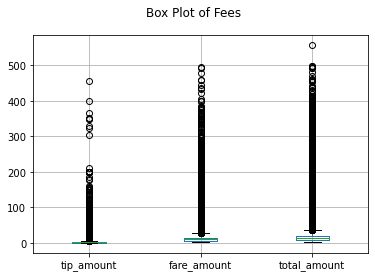

In [14]:
# initial view of fees
amount_boxplot = cleaned_yellow_09.boxplot(column=amount, fontsize=10,figsize=(6,4))
fig = amount_boxplot.get_figure()

fig.suptitle('Box Plot of Fees ')
fig.show()
fig.savefig("initial view of tips amount.png")

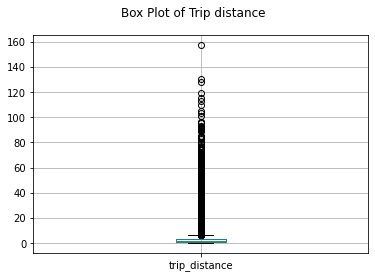

In [19]:
# initial view of fees
amount_boxplot = cleaned_yellow_09.boxplot(column="trip_distance", fontsize=10,figsize=(6,4))
fig = amount_boxplot.get_figure()

fig.suptitle('Box Plot of Trip distance ')
fig.show()
fig.savefig("initial view of distance amount.png")

85.0

In [29]:
# clean tips outliers
amount = ["tip_amount","fare_amount","total_amount"]
#https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles
Q1 = cleaned_yellow_09[amount].quantile(0.25)
Q3 = cleaned_yellow_09[amount].quantile(0.75)
IQR = Q3 - Q1

cleaned= cleaned_yellow_09[~((cleaned_yellow_09[amount]< (Q1 - 3 * IQR)) |(cleaned_yellow_09[amount]> (Q3 + 3 * IQR))).any(axis=1)]

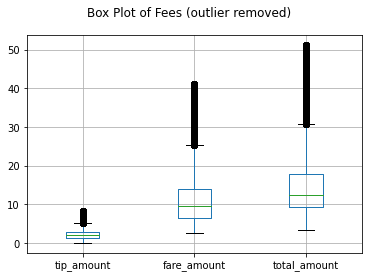

In [24]:
# show the tips after remove outliers
amount_boxplot = cleaned.boxplot(column=amount, fontsize=10,figsize=(6,4))
fig = amount_boxplot.get_figure()

fig.suptitle('Box Plot of Fees (outlier removed)')
fig.show()
fig.savefig("tips amount after cleaning ourliers.png")

## Feature Engineering 

In [31]:
# Creat a new column which only contains the pick up date
# Creat a new column which only contrains the pick up time
cleaned['date'] = cleaned['tpep_pickup_datetime'].str[5:10]
cleaned["Time_h"] = cleaned['tpep_pickup_datetime'].str[10:13]+":00"

In [32]:
# save to feather 
cleaned.reset_index().to_feather('18_cleaned_yellow_09.feather')